The task is to build a sentiment analysis model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, f1_score

In [2]:
# download the dataset: airline tweets
# original dataset on Kaggle: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [3]:
# save the dataset in Pandas dataframe
df = pd.read_csv('AirlineTweets.csv')

In [4]:
# check the dataset
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [5]:
df = df[['airline_sentiment', 'text']]

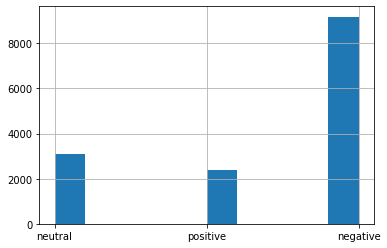

In [6]:
# check the sentiment distribution: it looks imbalanced
df['airline_sentiment'].hist()

In [7]:
# assign integers to sentiments
sentiment_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['sentiment_class'] = df['airline_sentiment'].map(sentiment_map)

In [8]:
# make train and test sets
df_train, df_test = train_test_split(df)

In [9]:
# use a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=2000)

In [10]:
X_train = vectorizer.fit_transform(df_train['text'])

In [11]:
X_test = vectorizer.transform(df_test['text'])

In [12]:
Y_train = df_train['sentiment_class']
Y_test = df_test['sentiment_class']

In [13]:
# use a logistic regression model, calculate accuracy and AUC score
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print('Train accuracy:', model.score(X_train, Y_train))
print('Test accuracy:', model.score(X_test, Y_test))

Train accuracy: 0.852823315118397
Test accuracy: 0.8079234972677596


In [14]:
pr_train = model.predict_proba(X_train)
pr_test = model.predict_proba(X_test)
print('Train AUC:', roc_auc_score(Y_train, pr_train, multi_class='ovo'))
print('Test AUC:', roc_auc_score(Y_test, pr_test, multi_class='ovo'))

Train AUC: 0.9422434479823122
Test AUC: 0.8984540062685745


In [15]:
p_train = model.predict(X_train)
p_test = model.predict(X_test)

In [16]:
# make a confusion matrix for the train set
cm = confusion_matrix(Y_train, p_train, normalize='true')
cm

array([[0.96111998, 0.00928478, 0.02959524],
       [0.19356628, 0.71547421, 0.09095951],
       [0.31698774, 0.04859895, 0.63441331]])

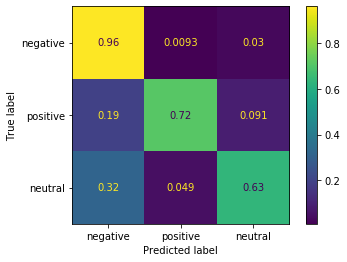

In [17]:
cm_plot = ConfusionMatrixDisplay(cm, display_labels=['negative', 'positive', 'neutral'])
cm_plot.plot()

In [18]:
# make a confusion matrix for the test set
cm_test = confusion_matrix(Y_test, p_test, normalize='true')
cm_test

array([[0.9487965 , 0.00962801, 0.04157549],
       [0.26071429, 0.60535714, 0.13392857],
       [0.39018405, 0.05766871, 0.55214724]])

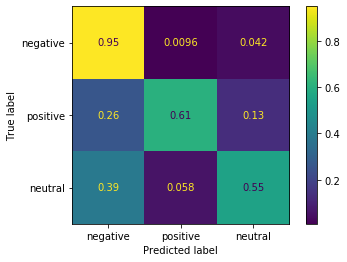

In [19]:
cm_test_plot = ConfusionMatrixDisplay(cm_test, display_labels=['negative', 'positive', 'neutral'])
cm_test_plot.plot()

In [20]:
# leave out neutral messages and check how the model deals with two classes
binary_class_list = [sentiment_map['positive'], sentiment_map['negative']]
df_b_train = df_train[df_train['sentiment_class'].isin(binary_class_list)]
df_b_test = df_test[df_test['sentiment_class'].isin(binary_class_list)]

In [21]:
X_train = vectorizer.fit_transform(df_b_train['text'])
X_test = vectorizer.transform(df_b_test['text'])

In [22]:
Y_train = df_b_train['sentiment_class']
Y_test = df_b_test['sentiment_class']

In [23]:
# the accuracy and AUC seem to have improved
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
print('Train accuracy:', model.score(X_train, Y_train))
print('Test accuracy:', model.score(X_test, Y_test))

Train accuracy: 0.9295078196872125
Test accuracy: 0.9173989455184535


In [24]:
pr_train = model.predict_proba(X_train)[:, 1]
pr_test = model.predict_proba(X_test)[:, 1]
print('Train AUC:', roc_auc_score(Y_train, pr_train))
print('Test AUC:', roc_auc_score(Y_test, pr_test))

Train AUC: 0.9778920780918756
Test AUC: 0.9582920443888715


In [25]:
word_index_map = vectorizer.vocabulary_

In [35]:
# print out most positive and negative words based on their weights
threshold = 2

positive_words = []
negative_words = []

for word, index in word_index_map.items():
    weight = model.coef_[0][index]
    if weight > threshold:
        positive_words.append((word, weight))
    elif weight < -threshold:
        negative_words.append((word, weight))

In [36]:
print('Most positive words:')
for word, weight in positive_words:
    print(word, weight)

Most positive words:
thanks 8.221830327419235
jetblue 3.069905433751638
wonderful 2.373920879600981
southwestair 3.205019233091361
love 4.20644259519481
awesome 4.2410709031900105
amazing 3.861275331204377
thank 7.742608896675111
good 2.784480860594679
virginamerica 3.280608950698568
great 5.355054437580786
best 3.7174451499812307
kudos 2.9028361031346015
excited 2.0856211361673087
nice 2.0358207435590487
worries 2.9577976966849464
appreciate 2.7021615472751015
thx 2.6425240549290723
excellent 2.5190150617193736


In [37]:
print('Most negative words:')
for word, weight in negative_words:
    print(word, weight)

Most negative words:
cancelled -2.775788524798223
nothing -2.2601190480190407
not -4.281006162005743
why -2.2575754693502796
hours -3.051782127920126
delayed -2.84367946732463
hour -2.1954576040933844
no -4.096657783090534
what -2.2199273383663733
hold -2.871466556948611
worst -2.932202281639857
